<a href="https://colab.research.google.com/github/snayudu/cbbanalysis/blob/main/CBB_Success_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Basketball 

---
In this exploration, I intend to analyze the data of college basketball teams from 2013-2021 to assess the factors that contribute to winning during the season as well as the postseason. I hope to find commonalities between underdog teams in the tournament to aid in better prediction of March Madness brackets.  



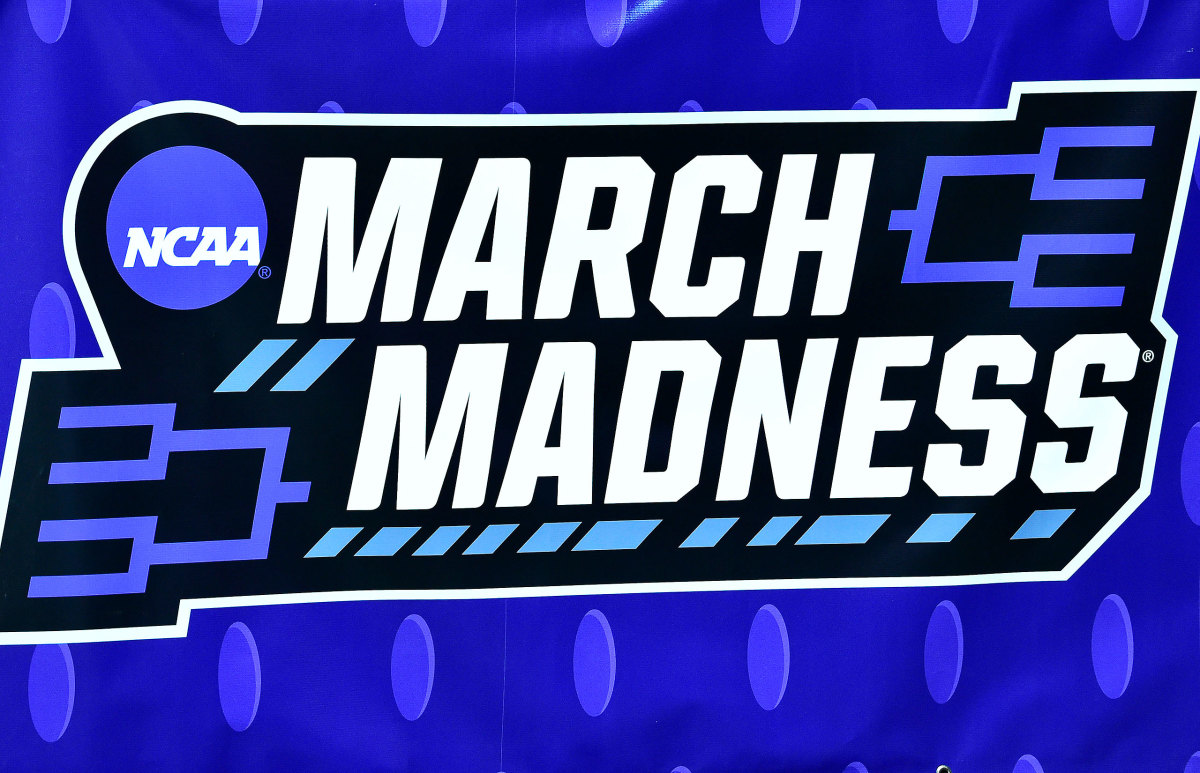

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://github.com/snayudu/cbbanalysis/raw/main/cbb.csv")

In [15]:
# Install plotly 4.14.3 using pip
# Colab environment supports pip
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

# If you're using a Jupyter Notebook or a Jupyter Lab environment (not Google Colab),
# uncomment one of the two lines at the bottom and run this code cell
# if you're using Anaconda (or Miniconda), use conda install ...
# otherwise, use pip install ...

# !conda install -c plotly plotly=4.14.3
# !pip install plotly==4.14.3

In [16]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

# Guiding Questions


---


Some of the guiding questions that I will use to frame my analysis include:


1.   What commonalities do the best teams have? The worst?
2.   Have there been any trend shifts in college basketball over the years?



In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print('There are ' + str(num_rows) + ' rows and ' + str(num_cols) + ' columns in this dataset.')

There are 2455 rows and 24 columns in this dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2455 non-null   object 
 1   CONF        2455 non-null   object 
 2   G           2455 non-null   int64  
 3   W           2455 non-null   int64  
 4   ADJOE       2455 non-null   float64
 5   ADJDE       2455 non-null   float64
 6   BARTHAG     2455 non-null   float64
 7   EFG_O       2455 non-null   float64
 8   EFG_D       2455 non-null   float64
 9   TOR         2455 non-null   float64
 10  TORD        2455 non-null   float64
 11  ORB         2455 non-null   float64
 12  DRB         2455 non-null   float64
 13  FTR         2455 non-null   float64
 14  FTRD        2455 non-null   float64
 15  2P_O        2455 non-null   float64
 16  2P_D        2455 non-null   float64
 17  3P_O        2455 non-null   float64
 18  3P_D        2455 non-null   float64
 19  ADJ_T       2455 non-null  

In [5]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [6]:
df.tail()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013
2454,Florida Gulf Coast,ASun,35,24,103.4,96.3,0.6952,51.6,46.9,21.0,22.1,32.5,32.8,35.2,32.7,52.3,46.9,33.4,31.3,69.1,-4.0,S16,15.0,2013


In [7]:
df.sample(20)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
565,Southern Miss,CUSA,29,9,92.4,109.2,0.1278,45.0,52.2,18.1,16.6,22.3,25.8,29.3,33.9,45.4,49.4,29.6,37.4,66.9,-16.7,NaN,NaN,2017
1659,Quinnipiac,MAAC,32,20,110.3,109.9,0.5121,46.8,48.0,17.6,12.0,41.9,27.2,48.1,36.2,44.6,46.5,35.7,34.7,69.9,-4.9,NaN,NaN,2014
2061,Ohio St.,B10,34,25,116.0,94.3,0.9154,54.1,48.7,17.1,17.9,30.2,25.2,31.1,29.5,54.7,46.1,35.3,35.1,68.2,4.5,R32,5.0,2018
1404,New Mexico St.,WAC,32,21,101.3,95.9,0.6525,50.2,44.8,20.2,16.2,36.0,25.1,36.9,28.4,50.7,42.3,32.5,33.5,66.4,-4.1,NaN,NaN,2016
2168,Vermont,AE,33,27,107.0,98.1,0.7324,52.6,48.7,16.8,19.1,27.3,22.2,35.9,27.5,51.6,46.3,35.9,35.1,66.7,-1.0,R64,13.0,2019
1049,California,P12,31,8,97.1,103.2,0.3301,44.5,54.5,20.8,19.7,34.8,30.6,38.1,38.4,45.1,51.6,28.6,39.4,69.9,-13.3,NaN,NaN,2018
1335,Western Illinois,Sum,26,8,96.7,107.9,0.2210,50.4,51.2,18.4,13.8,18.9,25.4,29.0,40.7,45.1,46.2,38.7,41.5,70.0,-15.3,NaN,NaN,2017
1285,Southeastern Louisiana,Slnd,30,16,96.3,103.1,0.3141,50.2,49.0,22.8,21.6,35.0,30.8,37.0,39.6,48.3,47.6,36.1,34.5,68.8,-11.9,NaN,NaN,2017
567,UTEP,CUSA,31,15,100.1,102.2,0.4419,51.8,49.5,19.0,17.5,22.2,25.0,36.3,39.1,51.9,48.5,34.3,34.0,67.5,-11.6,NaN,NaN,2017
39,Duke,ACC,36,30,118.4,91.5,0.9507,53.9,45.5,15.6,20.4,28.8,32.3,39.2,32.7,50.8,46.2,39.9,29.0,67.8,7.5,E8,2.0,2013


In [8]:
groupedyear = df.groupby('YEAR')
statsbyyear = groupedyear.mean().round(1)
statsbyyear = statsbyyear.reset_index().drop(columns='SEED')
statsbyyear

,YEAR,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,2013,31.5,15.7,100.8,100.8,0.5,48.5,48.7,20.0,20.0,31.6,31.8,36.0,36.2,47.5,47.7,33.7,34.0,66.0,-8.0
1,2014,31.4,15.7,104.6,104.6,0.5,49.5,49.7,18.4,18.3,31.2,31.4,40.5,40.8,48.5,48.7,34.3,34.5,66.6,-7.4
2,2015,31.3,15.7,102.3,102.3,0.5,49.0,49.2,19.1,19.0,30.9,31.1,37.0,37.3,47.7,47.9,34.2,34.4,64.9,-7.8
3,2016,31.4,15.7,103.9,103.9,0.5,49.8,50.0,18.2,18.1,29.6,29.8,36.6,36.9,48.7,48.8,34.5,34.7,69.1,-7.8
4,2017,31.5,17.0,103.8,103.8,0.5,50.4,50.6,18.6,18.5,29.1,29.3,35.3,35.6,49.3,49.4,34.9,35.1,69.5,-7.8
5,2018,31.6,17.1,104.4,104.4,0.5,50.9,51.1,18.4,18.4,28.5,28.7,33.5,33.8,49.9,50.1,35.0,35.1,69.4,-8.0
6,2019,31.7,17.1,103.3,103.3,0.5,50.6,50.8,18.6,18.5,28.2,28.4,33.0,33.2,50.1,50.2,34.3,34.4,69.2,-7.8


In [20]:
fig=px.line(statsbyyear,x='YEAR',y='ADJOE',title='Offensive Efficiency (2013-2019')
fig.show()

In [23]:
fig=px.line(statsbyyear,x='YEAR',y='ADJ_T',title='Tempo (2013-2019')
fig.show()

# Trends over Time
**Offensive Efficiency**

Looking at the trends over the years, we can see that offensive efficiency of college basketball teams was steadily rising until 2019, where there was a slight dropoff. For a team to have a bad year would make sense but for the entire college basketball bracket to drop off was a bit of a statistical anomoly. Looking further into the situation, I learned that the NCAA approved a rule change that moved the three-point line back prior to the 2019 season. This is a huge factor in the offensive efficiency dropoff we noticed as players had not adjusted to the new three-point line distance. 

**Defensive Efficiency**

As teams are getting better on the offensive side, we can see that the defensive ratings as a whole are also increasing - this shows that college basketball teams have not found a way to defend against the new offensive strategies being deployed by their opponents.

**Tempo**

Another interesting change in college basketball is the increase in tempo. However, like the dip in three point shooting in 2019, this change is largely due to a rule that was implemented by the NCAA rules committee. The new rule meant that teams only had 30 seconds on the shot clock as opposed to 35 seconds that they had before as well as only 10 seconds to advance the ball to the front court. This means that each game has more shots and therefore the tempo of the game will increase.

---
*Rule change memos*

**2019**

https://www.ncaa.com/news/basketball-men/article/2019-06-05/mens-college-basketball-3-point-line-extended-international

**2015**

https://www.ncaa.com/news/basketball-men/article/2015-06-08/ncaa-changes-shot-clock-30-seconds-makes-other-changes-game




# Postseason Teams Only
Because I want to analyze team performance during the NCAA tournament, I dropped all columns where the seed was 'NaN', whcih meant that the team hadn't qualified to the tournament.

In [9]:
playoffteams = df.dropna()

In [10]:
playoffteams.sort_values(['SEED','YEAR'])

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,27.0,38.2,33.3,40.0,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
2131,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,20.8,37.8,29.8,40.8,29.9,55.0,42.1,36.5,32.9,65.1,7.6,R32,1.0,2013
2447,Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,20.9,39.0,31.4,45.8,27.0,52.0,43.2,40.3,30.4,67.8,7.8,S16,1.0,2013
2448,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,18.4,33.8,29.3,39.5,32.0,52.9,39.3,36.4,30.3,67.7,7.5,S16,1.0,2013
34,Arizona,P12,38,33,116.2,87.4,0.9636,51.7,42.3,15.7,19.1,36.4,27.3,41.0,34.2,50.7,40.2,36.4,32.0,64.3,9.4,E8,1.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,Iona,MAAC,33,17,105.2,108.8,0.4044,53.0,52.3,17.3,18.5,25.1,30.7,36.8,28.5,53.2,50.3,35.1,36.6,71.9,-10.4,R64,16.0,2019
2257,Fairleigh Dickinson,NEC,33,21,104.5,110.3,0.3494,54.2,52.0,19.7,20.2,29.5,33.2,35.7,29.4,51.0,51.3,40.1,35.3,68.0,-9.3,R64,16.0,2019
2297,North Dakota St.,Sum,33,19,106.6,109.0,0.4369,53.5,53.6,15.7,14.4,20.7,25.9,32.2,26.5,52.1,52.6,36.7,37.0,66.5,-8.6,R64,16.0,2019
2380,North Carolina Central,MEAC,31,18,98.0,108.3,0.2414,49.9,49.9,22.7,17.5,34.8,26.9,33.5,31.4,51.3,50.9,31.5,32.0,66.4,-10.9,R68,16.0,2019


In [11]:
groupedseed = playoffteams.groupby('SEED')
statsbyseed = groupedseed.mean().round(1)
statsbyseed = statsbyseed.reset_index().drop(columns='YEAR')
statsbyseed

,SEED,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1.0,37.4,32.6,120.1,90.7,1.0,54.4,45.8,16.5,19.2,34.0,27.9,37.1,29.2,53.8,44.5,37.1,32.2,67.3,9.6
1,2.0,36.4,29.5,118.1,92.1,0.9,53.5,46.0,16.7,18.2,33.0,27.9,37.3,30.9,52.2,44.6,37.3,32.4,67.3,8.0
2,3.0,35.7,27.7,116.9,93.7,0.9,53.2,46.8,17.2,18.9,33.0,29.1,35.9,32.0,52.5,45.4,36.3,32.9,67.4,6.3
3,4.0,35.7,27.1,115.4,93.1,0.9,52.4,47.0,17.0,19.9,33.2,28.9,37.2,33.8,51.3,45.7,36.2,33.0,67.8,5.4
4,5.0,34.8,25.2,113.7,93.2,0.9,51.9,47.3,17.3,20.0,32.3,29.2,35.1,33.5,50.5,46.1,36.2,33.0,67.6,4.3
5,6.0,34.5,24.9,113.5,94.9,0.9,52.1,47.5,17.5,18.7,33.1,29.0,36.7,31.9,51.2,46.2,35.9,33.2,67.7,3.7
6,7.0,34.6,25.2,113.0,94.9,0.9,51.8,47.5,16.6,18.8,31.6,28.7,36.3,33.6,50.4,46.2,36.2,33.3,67.0,2.8
7,8.0,34.3,23.5,112.3,95.6,0.9,51.5,47.3,17.8,18.4,33.0,29.2,37.0,32.0,50.7,46.0,35.5,33.2,67.5,2.0
8,9.0,34.2,22.1,111.4,95.0,0.9,51.2,47.4,18.0,19.2,31.5,30.2,37.7,34.3,50.4,45.8,35.0,33.5,67.7,1.5
9,10.0,34.0,21.9,112.8,96.4,0.9,51.4,48.4,17.2,18.6,31.7,29.4,36.5,32.8,50.1,47.8,35.8,33.1,68.4,1.3


Once I had all the playoff teams grouped by tournament seeding, I wanted to see if seeding was directly tied to wins/losses or if strength of schedule was a major factor.

In [12]:
statsbyseed.sort_values('W',ascending=False)

,SEED,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1.0,37.4,32.6,120.1,90.7,1.0,54.4,45.8,16.5,19.2,34.0,27.9,37.1,29.2,53.8,44.5,37.1,32.2,67.3,9.6
1,2.0,36.4,29.5,118.1,92.1,0.9,53.5,46.0,16.7,18.2,33.0,27.9,37.3,30.9,52.2,44.6,37.3,32.4,67.3,8.0
2,3.0,35.7,27.7,116.9,93.7,0.9,53.2,46.8,17.2,18.9,33.0,29.1,35.9,32.0,52.5,45.4,36.3,32.9,67.4,6.3
3,4.0,35.7,27.1,115.4,93.1,0.9,52.4,47.0,17.0,19.9,33.2,28.9,37.2,33.8,51.3,45.7,36.2,33.0,67.8,5.4
11,12.0,32.8,25.8,109.8,98.0,0.8,52.5,48.0,17.2,19.2,31.7,27.7,36.2,35.0,52.1,47.3,35.4,32.9,66.7,0.5
4,5.0,34.8,25.2,113.7,93.2,0.9,51.9,47.3,17.3,20.0,32.3,29.2,35.1,33.5,50.5,46.1,36.2,33.0,67.6,4.3
6,7.0,34.6,25.2,113.0,94.9,0.9,51.8,47.5,16.6,18.8,31.6,28.7,36.3,33.6,50.4,46.2,36.2,33.3,67.0,2.8
5,6.0,34.5,24.9,113.5,94.9,0.9,52.1,47.5,17.5,18.7,33.1,29.0,36.7,31.9,51.2,46.2,35.9,33.2,67.7,3.7
12,13.0,32.9,24.3,107.4,99.3,0.7,52.3,47.9,17.8,18.9,30.4,28.5,37.5,35.3,51.2,46.5,36.2,33.8,68.1,-1.6
7,8.0,34.3,23.5,112.3,95.6,0.9,51.5,47.3,17.8,18.4,33.0,29.2,37.0,32.0,50.7,46.0,35.5,33.2,67.5,2.0


Looking at the Wins column and comparing it to the seed, we can see that the seed was primarily driven by the wins column as the each seed always had a higher average wins total than the seed above them.

In [13]:
lastseed = playoffteams[playoffteams['SEED']==16]
lastseed

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2047,UMBC,AE,33,25,102.1,102.2,0.4963,52.2,51.6,17.2,20.7,25.9,28.3,30.2,30.8,48.1,51.0,38.2,35.0,69.3,-4.9,R32,16.0,2018
2175,Florida Gulf Coast,ASun,31,17,102.9,102.4,0.5136,51.5,47.7,17.2,15.9,31.7,27.5,37.3,35.3,51.5,48.3,34.2,31.2,68.0,-8.4,R64,16.0,2016
2216,Coastal Carolina,BSth,30,20,104.5,103.0,0.5417,50.0,47.7,17.5,16.9,34.8,28.0,38.9,35.0,48.1,45.8,35.9,33.8,64.1,-5.1,R64,16.0,2015
2219,Radford,BSth,34,23,101.3,102.8,0.4559,49.3,50.1,18.7,20.2,32.0,28.0,31.2,31.7,47.1,48.9,35.0,34.6,64.2,-6.5,R64,16.0,2018
2220,Gardner Webb,BSth,32,23,106.0,106.6,0.4852,54.8,50.5,17.1,18.2,22.4,31.3,38.3,27.6,53.6,50.4,37.7,33.7,68.7,-5.0,R64,16.0,2019
2222,UC Davis,BW,34,23,97.4,100.8,0.4033,48.4,48.7,20.3,19.6,29.1,28.3,40.8,33.1,46.9,48.5,34.5,32.6,70.3,-7.5,R64,16.0,2017
2237,Penn,Ivy,32,24,103.6,97.6,0.6644,52.9,47.0,16.6,17.0,23.8,22.6,33.4,31.8,53.3,48.0,34.8,30.0,70.1,-3.3,R64,16.0,2018
2242,Iona,MAAC,33,17,105.2,108.8,0.4044,53.0,52.3,17.3,18.5,25.1,30.7,36.8,28.5,53.2,50.3,35.1,36.6,71.9,-10.4,R64,16.0,2019
2246,Hampton,MEAC,35,17,94.8,102.3,0.2939,45.6,46.4,20.2,20.1,31.8,30.9,43.8,45.5,45.6,44.5,30.4,33.9,69.6,-12.6,R64,16.0,2015
2247,Hampton,MEAC,31,20,98.2,107.5,0.2615,46.7,48.6,18.7,16.7,34.5,27.2,41.3,35.7,47.3,47.5,30.5,33.8,71.9,-6.3,R64,16.0,2016


I wanted to analyze 16 seeds to see if there was a correlation between certain stats and tournament success as underdogs but there has only been one team over the time period (2013-2019) that has successfully reached the Round of 32. I will expand the terms of underdog to the 12-16 seeds.

In [14]:
underdog = playoffteams[playoffteams['SEED']>=12]
underdog

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2047,UMBC,AE,33,25,102.1,102.2,0.4963,52.2,51.6,17.2,20.7,25.9,28.3,30.2,30.8,48.1,51.0,38.2,35.0,69.3,-4.9,R32,16.0,2018
2082,Liberty,BSth,33,29,109.2,99.6,0.7428,55.9,48.9,17.2,20.5,25.2,26.4,26.7,32.7,56.4,48.3,36.8,33.3,63.5,-0.6,R32,12.0,2019
2083,Hawaii,BW,32,26,106.9,95.0,0.7945,51.9,44.9,18.1,19.8,30.4,26.4,45.4,40.2,54.1,44.8,32.2,30.0,71.4,0.8,R32,13.0,2016
2084,UC Irvine,BW,36,31,107.2,97.6,0.7458,51.3,44.1,17.5,16.7,33.7,27.0,28.7,33.0,50.1,40.7,35.9,33.9,66.6,0.7,R32,13.0,2019
2085,UAB,CUSA,35,19,102.7,100.1,0.5721,47.6,47.6,20.1,19.7,34.2,33.1,35.7,33.6,46.6,47.4,33.2,31.9,65.3,-7.5,R32,14.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,Liberty,BSth,33,12,100.1,109.7,0.2591,48.5,47.8,19.8,15.1,29.0,32.6,38.4,38.5,44.9,48.6,37.0,30.9,65.7,-15.6,R68,16.0,2013
2431,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,20.9,29.6,28.8,29.4,33.9,51.6,48.8,35.1,29.0,65.4,-1.1,S16,12.0,2019
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [17]:
underdoggrouped=underdog.groupby(['SEED','POSTSEASON']).size().reset_index(name='COUNT')
print(underdoggrouped)

    SEED POSTSEASON  COUNT
0   12.0        R32     10
1   12.0        R64     16
2   12.0        R68      1
3   12.0        S16      2
4   13.0        R32      4
5   13.0        R64     23
6   13.0        R68      1
7   13.0        S16      1
8   14.0        R32      5
9   14.0        R64     23
10  15.0        R32      1
11  15.0        R64     26
12  15.0        S16      1
13  16.0        R32      1
14  16.0        R64     27
15  16.0        R68     14


In [18]:
fig=px.box(underdog,x='W',y='SEED',orientation='h',title='Win Dispersion for Underdog Teams')
fig.show()

In [19]:
fig=px.box(underdog,x='ADJDE',y='POSTSEASON',orientation='h',title='Defensive Efficiency Tournament Success')
fig.show()

**Rebounding wins championships?**

Legendary women's basketball coach Pat Summitt said that "Offense sells tickets, defense wins games, and rebounding wins championships." I have never heard of rebounding being that important as compared to playing good defense but I wanted to test out her theory that being a good rebounding team could lead to tournament success.

In [25]:
fig=px.box(underdog,x='ORB',y='POSTSEASON',orientation='h',title='Rebounding Tournament Success')
fig.show()

In [22]:
fig = px.sunburst(
    underdoggrouped,
    path=['SEED', 'POSTSEASON'],
    values='COUNT',
    color='POSTSEASON',
    title='Postseason Outcomes for Underdogs',
    width=600,
    height=600
)
fig.show()

# Conclusion

Looking at the results of our analysis, we can come to a couple conclusions.


1.   Having a good defense leads to tournament success
2.   Being a higher seed leads to tournament success

**Defense wins Championships**

While none of the underdog teams won the championship between 2013-2019, it is clear that the blueprint for teams trying to upset other teams during March Madness starts with having a good defense. As can be seen in the box plot of defensive efficiency, teams that had good defenses performed much better than teams with average or subpar defenses. While this is quite obvious, it i a good reminder that defense is truly the most impactful part of basketball success.

**High Seeding**

Even though a 12 seed is considered a bottom seed, it clear that any increase in seeding is beneficial for a team's path to success during the NCAA tournament. No 16 seed has made the Sweet 16 between 2013-2019 but 2 12 seeds have. This shows that it is extremely important for teams to play well during the season for better seeding. Just making the tournament gives you a chance but being in a higher seed dramatically improves your odds of advancing through the bracket.



